In [123]:
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [124]:
n_task_per_file = 50
n_files = 10
#base_dir = "toy_eg_stage1_"#
base_dir = "proportional/toy_eg_stage1_"
files_list = []
for i in range(n_files):
    dir = base_dir + str(i*n_task_per_file) + "_"  + str((i+1)*n_task_per_file) + ".pkl"
    files_list.append(dir)

In [125]:
coverage_df = pd.DataFrame()
length_df = pd.DataFrame()
MSE_df = pd.DataFrame()

for f_dir in files_list:
    coverage_i, length_i, MSE_i = joblib.load(f_dir)
    coverage_df = pd.concat([coverage_df, pd.DataFrame(coverage_i)])
    length_df = pd.concat([length_df, pd.DataFrame(length_i)])
    MSE_df = pd.concat([MSE_df, pd.DataFrame(MSE_i)])

In [126]:
new_order = ['Naive', 1.0, 2.5, 5.0, 10.0, 'Tree val']
coverage_df = coverage_df[new_order]
coverage_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,0.666667,0.285714,0.666667,0.833333,0.800000,0.833333
1,0.833333,0.833333,0.500000,0.666667,0.600000,1.000000
0,0.666667,0.666667,0.714286,0.833333,1.000000,1.000000
1,0.666667,0.500000,0.833333,1.000000,0.833333,1.000000
0,0.500000,0.666667,0.400000,0.666667,0.833333,0.833333
1,0.600000,0.600000,1.000000,1.000000,1.000000,0.800000
0,0.857143,0.666667,0.714286,0.714286,0.600000,1.000000
1,0.666667,0.285714,0.833333,0.666667,1.000000,1.000000
0,0.833333,0.666667,0.666667,0.857143,1.000000,0.666667
1,0.666667,0.600000,0.857143,1.000000,0.833333,0.833333


In [127]:

length_df = length_df[new_order]
length_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,1.180773,2.844295,1.553740,1.252676,1.139694,11.678977
1,1.186313,3.259669,1.567261,1.331822,1.081019,6.459992
0,1.191282,2.593699,1.628650,1.361311,1.195662,4.762455
1,1.170989,2.641526,1.597304,1.219911,1.293527,3.519485
0,1.182901,2.924717,1.301730,1.371241,1.243002,1.885223
1,1.106120,2.590780,1.598470,1.301031,1.101390,2.564987
0,1.239242,2.736878,1.798993,1.387233,1.113807,4.822546
1,1.173822,3.027286,1.625732,1.242057,1.252877,3.317263
0,1.177056,2.791233,1.465548,1.371570,1.155326,18.450339
1,1.185567,2.903584,1.682042,1.293475,1.189017,2.767237


In [128]:
MSE_df = MSE_df[new_order]
MSE_df

,Naive,1.0,2.5,5.0,10.0,Tree val
0,4.763445,5.099341,4.691955,4.867183,6.538500,4.763445
1,4.268548,4.594842,4.786014,4.746710,5.226419,4.268548
0,4.461961,5.027958,4.463458,5.414568,4.612565,4.461961
1,4.481753,4.610213,4.795003,5.038020,4.972591,4.481753
0,4.442137,4.710165,4.979384,5.370244,5.734045,4.442137
1,5.337185,5.307172,5.464615,5.751789,5.541909,5.337185
0,4.337780,4.581951,4.239530,4.546645,4.840506,4.337780
1,4.558086,4.214417,5.095102,4.860356,5.265234,4.558086
0,3.676316,3.664569,4.168648,3.800426,4.567156,3.676316
1,4.092110,4.223069,4.379649,4.704413,4.687926,4.092110


In [129]:
import seaborn as sns
def boxplots(dfs, metrics, len_lim=10, MSE_lim=10, 
             len_baseline_key=None, MSE_baseline_key=None,
             col_names=None, palette=None):
    # Set up the subplots: one for each metric
    fig, axes = plt.subplots(1, 3, figsize=(15, 6))
    
    # Iterate over the dataframes and create a boxplot for each
    for i, (df, metric) in enumerate(zip(dfs, metrics)):
        if col_names is not None:
            df = df.copy()
            df.columns = col_names
        showmeans = False if metric == "Coverage" else True
        sns.boxplot(data=df, ax=axes[i], palette=palette, showfliers=False, 
                    showmeans=showmeans)
        axes[i].set_title(f'Boxplot for {metric}')
        axes[i].set_xlabel('Method')
        axes[i].set_ylabel('Value')
        new_label = [x if x != "Naive" else r"Naïve" for x in col_names]
        axes[i].set_xticklabels(new_label)
        # Add triangles for the mean values
        means = df.mean()  # Calculate mean for each method (column)
        print(metric,":\n",means.T)
        for j, mean in enumerate(means):
            if metric == "Coverage":
                axes[i].plot(j, mean, marker='v', color='#40E0D0', markersize=10,)  # Add a red triangle for the mean
        if metric == "Coverage":
            axes[i].set_ylim(0,1)
            axes[i].axhline(y=0.9, linestyle='dotted', color='grey', linewidth=1)
        elif metric == "Length":
            axes[i].set_ylim(0,len_lim)
            #if len_baseline_key:
            #    axes[i].axhline(y=means[len_baseline_key], linestyle='dotted', color='grey')
        elif metric == "MSE":
            axes[i].set_ylim(3,7)
            if MSE_baseline_key:
                axes[i].axhline(y=means[MSE_baseline_key], linestyle='dotted', color='grey',
                                linewidth=1)
    
    # Show the plots
    plt.tight_layout()
    plt.show()

/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)
/var/folders/6t/y2p8qwk54f7fnkwds613w0040000gs/T/ipykernel_302/1830243539.py:20: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(new_label)


Coverage :
 Naive          0.628571
RRT(1)         0.629286
RRT(2.5)       0.705952
RRT(5)         0.760714
RRT(10)        0.866667
Tree-values    0.905000
dtype: float64
Length :
 Naive          1.175839
RRT(1)         2.894493
RRT(2.5)       1.613230
RRT(5)         1.308182
RRT(10)        1.169235
Tree-values    6.282357
dtype: float64
MSE :
 Naive          4.730264
RRT(1)         4.752576
RRT(2.5)       4.971028
RRT(5)         5.241396
RRT(10)        5.383654
Tree-values    4.730264
dtype: float64


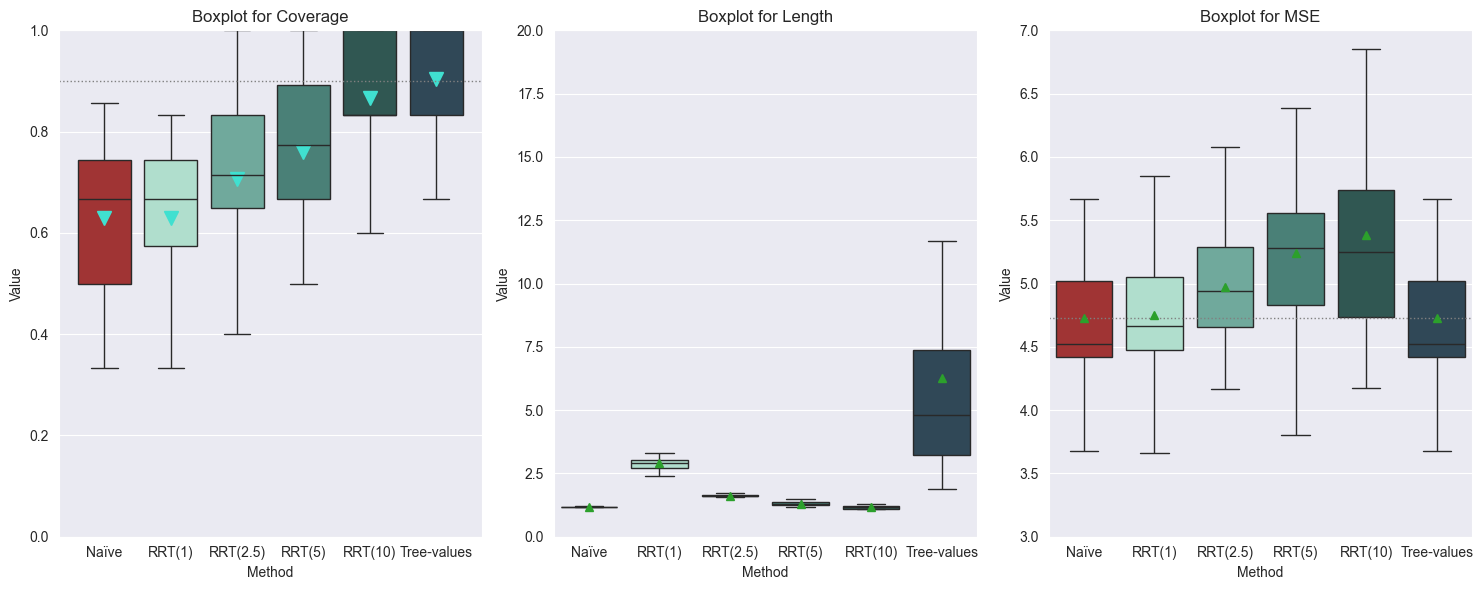

In [130]:

boxplots(dfs=[coverage_df, 
              length_df, 
              MSE_df], 
         len_lim=20,
         len_baseline_key="Naive",
         MSE_baseline_key="Naive",
         metrics=["Coverage", "Length", "MSE"],
         col_names=["Naive", "RRT(1)", "RRT(2.5)", "RRT(5)", "RRT(10)",
                    "Tree-values"], 
         palette=["#B22222", "#A8E6CF", "#66B2A2", "#41897D", "#2A5D57", "#2A4A5D"])